## Méthode k-nn

On utulise dans un premier temps uniquement les données du scirpt : 

In [2]:
from functions import *


In [3]:
data = pd.read_csv('../Data/Script_matrix.csv', sep=';', encoding='unicode_escape')

In [4]:
y = data['House'].to_numpy()
X = data.drop(['Character', 'House'], axis=1)
# X

,Gender,Half-blood,Muggle,Muggle-born,Muggle-born or Half-blood,Part-Goblin,Part-Human or Half-giant,Pure-blood,Pure-blood or Half-blood,Quarter-Veela,Squib,Unknown,professor,sir,hogwarts,slytherin,school,year,gryffindor,kill,chamber,wizard,Word freq(%)
0,0,1,0,0,0,0,0,0,0,0,0,0,10,14,6,7,4,6,0,6,11,4,18.689284
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,6,2,5,9.352192
2,1,0,0,1,0,0,0,0,0,0,0,0,5,0,4,6,0,3,2,0,4,3,8.229728
3,0,1,0,0,0,0,0,0,0,0,0,0,7,0,3,3,4,3,7,0,3,0,7.384104
4,0,0,0,0,0,0,1,0,0,0,0,0,13,5,9,0,3,4,0,0,0,7,9.910908
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.649318
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.392611
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.266774
8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.145971
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.055368


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=5)
print("train set:", X_train.shape)
print("test set:", X_test.shape)

train set: (118, 23)
test set: (14, 23)


In [7]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.5508474576271186
test score: 0.21428571428571427


In [8]:
from sklearn.model_selection import cross_val_score

In [11]:
cv = StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv,scoring="accuracy")

array([0.36363636, 0.36363636, 0.42424242, 0.42424242])

In [12]:
cross_val_score(KNeighborsClassifier(), X, y, cv=cv, scoring="accuracy").mean()

0.393939393939394

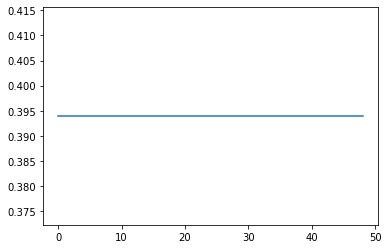

In [17]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(), X, y, cv=cv).mean()
    val_score.append(score)

plt.plot(val_score)

In [18]:
#validation curve permet de créeer ce genre de graphique 

In [19]:
from sklearn.model_selection import validation_curve

C:\Users\Jihene Belgaied\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<function matplotlib.pyplot.legend(*args, **kwargs)>

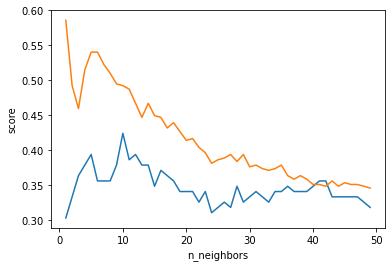

In [20]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors',k ,cv=cv)
val_score.mean(axis=1)
plt.plot(k, val_score.mean(axis=1), label= "validation")
plt.plot(k, train_score.mean(axis=1), label="train")

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend

overfitting : le modèle s'est trop oerfectionné sur le trainset et a perdu tout sens de généralisation

optimisation pour les autres hyperpapramètres : GridSerachCV par cv

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'n_neighbors': np.arange(1,20),'metric': ['euclidean','manhattan']}


In [24]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)

In [25]:
grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [26]:
grid.best_score_

0.41551724137931034

In [27]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [28]:
model = grid.best_estimator_

In [29]:
model.score(X_test, y_test)

0.2857142857142857

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[3, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [3, 1, 0, 0, 1]], dtype=int64)

## On refait les mêmes étapes avec la matrice contenant les varaibles additionnelles :  

In [31]:
data_ = pd.read_csv('../Data/Final_matrix.csv', sep=';', encoding='unicode_escape')

In [32]:
y1 = data_['House'].to_numpy()
X1 = data_.drop(['Character', 'House'], axis=1)
# X1

,Gender,Half-blood,Muggle,Muggle-born,Muggle-born or Half-blood,Part-Goblin,Part-Human or Half-giant,Pure-blood,Pure-blood or Half-blood,Quarter-Veela,Squib,Unknown,professor,sir,hogwarts,slytherin,school,year,gryffindor,kill,chamber,wizard,Word freq(%),minister of magic,gringotts wizarding bank_x,death eaters,albus dumbledore,dumbledore's army,lord voldemort,order of the phoenix,original order of the phoenix,british ministry of magic,ministry of magic,gellert grindelwald's acolytes,hogwarts school of witchcraft and wizardry,healing magic,breeding bulldogs,pretending magic doesn't exist,liaising with giants,duelling,undercover work,occlumency,learned in the theory of defensive magic,said to be a great wizard,nonverbal magic,beater,auror,less adept in the practise,controlling peeves,pyrotechnics,many traditional hogwarts recipes originated with her,teaching,crossbowmanship,schmoozing clients,sniffing out mischief,parselmouths,model student,an incomparable understanding of wandcraft,heir of slytherin,and therefore possesses some of their magical powers,dark magic,spotting nargles,cruciatus curse,imperius curse,duellist,part veela,also skilled in non-verbal magic,magizoology,learned with dumbledore's army,parseltongue,advanced self-transfiguration,one-time gryffindor seeker,household spells,an excellent dancer,photography,captain of the gryffindor quidditch team,though the gift is unpredictable and unconscious,being a prefect,revising,refereeing quidditch matches,teaching and studying the muggle world,quidditch keeper,prefect,writing,animagus,a seer,accomplished occlumens,above average strength,order of merlin,outstanding manipulation,herbology,'acquiring' the odd muggle car,skilled duellist and potioneer,carrying out escort missions for the order,boring a class with facts that might be interesting if anyone else was giving the lesson,chaser,highly skilled dragon trainer,works for the department for the regulation and control of magical creatures,expert potioneer,multilingual,seeker,gathering information for the order,spying for lord voldemort,duellist experienced occlumens,potions,an enthusiastic volunteer for the order and a helpful escort for harry and his relatives,covering up the spots that blight her face after betraying dumbledore's army,muggle world works,captain,skilled in the dark arts,carrying out guard duty for the order,past hogwarts head boy,she was also selected to compete in the triwizard tournament,gringotts wizarding bank_y,turning a blind eye to the continuing threat of dark magic in the name of keeping up morale,hard-working,inferi creation and control,talented auror,considered by many to be one of the most powerful wizards of his time,wisdom,quidditch goalkeeping,almost everything,getting the wrong end of the stick,intelligent,accomplished legilimens,in the words of dumbledore himself,dealing in stolen cauldrons,skilled medical healer,curing peasants of the pox,defence against the dark arts,skilled potioneer,fought and killed molly weasley's brothers and remus lupin,bat-bogey hex,resistant to stunning spells,her punishment quill is of her own invention,extremely skilled witch,the most accomplished duellist of his time,wizard chess,and therefore may possess some of their magical powers,quidditch commentary,divination,bartending,flying,caring for ariana,defensive spells,quidditch captain,charms,second class,able to fight the imperius curse,intelligence,spiking chocolate cauldrons with love potion,broadcasting,physical combat,spreading anti-muggle propaganda,dark lord,metamorphmagus
0,0,1,0,0,0,0,0,0,0,0,0,0,10,14,6,7,4,6,0,6,11,4,18.689284,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,6,2,5,9.352192,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.1, random_state=5)
print("train set:", X_train.shape)
print("test set:", X_test.shape)

train set: (113, 156)
test set: (13, 156)


In [34]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.672566371681416
test score: 0.5384615384615384


In [35]:
cv = StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv,scoring="accuracy")

array([0.36363636, 0.36363636, 0.42424242, 0.42424242])

In [36]:
cross_val_score(KNeighborsClassifier(), X, y, cv=cv, scoring="accuracy").mean()

0.393939393939394

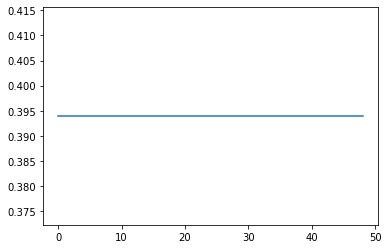

In [37]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(), X, y, cv=cv).mean()
    val_score.append(score)

plt.plot(val_score)

C:\Users\Jihene Belgaied\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<function matplotlib.pyplot.legend(*args, **kwargs)>

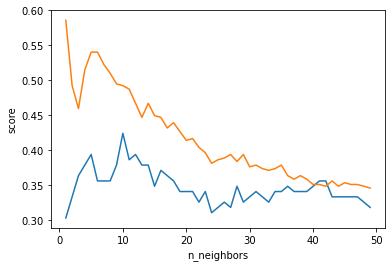

In [38]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X, y, 'n_neighbors',k ,cv=cv)
val_score.mean(axis=1)
plt.plot(k, val_score.mean(axis=1), label= "validation")
plt.plot(k, train_score.mean(axis=1), label="train")

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend

In [39]:
param_grid = {'n_neighbors': np.arange(1,20),'metric': ['euclidean','manhattan']}


In [40]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)

In [41]:
grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [42]:
grid.best_score_

0.5932881773399015

In [43]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 13}

In [44]:
model = grid.best_estimator_

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[1, 1, 0, 0],
       [0, 3, 0, 1],
       [1, 1, 1, 0],
       [0, 2, 0, 2]], dtype=int64)

# Ou sinon

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import statistics as stat

In [3]:
matrix = pd.read_csv('../Data/Script_matrix.csv', sep=';', encoding='unicode_escape')

In [75]:
new = pd.read_csv('../Data/Script_matrix_3.csv', sep=';', encoding='unicode_escape')

In [4]:
Y = matrix['House']
X = matrix.drop(['Character', 'House'], axis=1)

In [77]:
Y_new = new['House']
X_new = new.drop(['Character', 'House'], axis=1)

In [5]:
grid_params = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

score = 'accuracy'

scores = []
new_scores = []
cv_scores = []

In [80]:
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, stratify=Y)

    gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    scoring=score,
    n_jobs=-1
    )

    gs_results = gs.fit(x_train, y_train)

    metric = list(gs_results.best_params_.values())[0]
    n_neighbors = list(gs_results.best_params_.values())[1]
    weights = list(gs_results.best_params_.values())[2]

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

    cv_score = stat.mean(cross_val_score(knn, X, Y, cv=10))

    cv_scores.append(cv_score*100)

    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    scores.append(accuracy_score(y_test, y_pred)*100)

In [81]:
cv_mean = stat.mean(cv_scores)
sm = stat.mean(scores)

In [82]:
print(cv_mean)
print(sm)

37.527472527472526
32.857142857142854


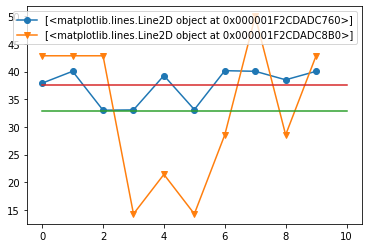

In [83]:
p1=plt.plot(cv_scores,marker='o', label='cross val score')
p2=plt.plot(scores,marker='v', label="knn accuracy score")
plt.legend([p1, p2])
plt.plot([0,10], [sm, sm])
plt.plot([0,10], [cv_mean, cv_mean])
plt.show()

# Autre essai

## Script matrix : 25%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import statistics as stat

In [ ]:
matrix = pd.read_csv('../Data/Script_matrix.csv', sep=';', encoding='unicode_escape')

In [14]:
new = pd.read_csv('../Data/Script_matrix_3.csv', sep=';', encoding='unicode_escape')

In [ ]:
Y = matrix['House']
X = matrix.drop(['Character', 'House'], axis=1)

In [15]:
Y_new = new['House']
X_new = new.drop(['Character', 'House'], axis=1)

In [25]:
grid_params = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

score = 'accuracy'

In [26]:
    gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    scoring=score,
    n_jobs=-1
    )

    gs_results = gs.fit(X, Y)

In [27]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [28]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='euclidean')
cross_val_score(knn, X, Y, cv=10)

array([0.57142857, 0.35714286, 0.30769231, 0.38461538, 0.15384615,
       0.23076923, 0.46153846, 0.61538462, 0.53846154, 0.38461538])

In [29]:
sm =stat.mean(cross_val_score(knn, X, Y, cv=10))
sm

0.40054945054945057

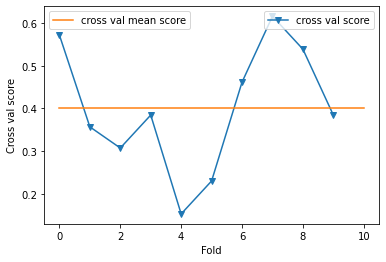

In [30]:
line_1, = plt.plot(cross_val_score(knn, X, Y, cv=10), marker='v', label='cross val score')
line_2, = plt.plot([0,10], [sm, sm], label='cross val mean score')
first_legend = plt.legend(handles=[line_1], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line_2], loc=2)
plt.xlabel('Fold')
plt.ylabel('Cross val score')
plt.show()

In [31]:
knn.fit(X, Y)
Y_pred = knn.predict(X_new)
pd.DataFrame([Y_new, Y_pred])

,0,1,2,3,4,5,6,7
House,Gryffindor,Gryffindor,Gryffindor,Gryffindor,Ravenclaw,Slytherin,Slytherin,Other
Unnamed 0,Other,Gryffindor,Other,Ravenclaw,Slytherin,Gryffindor,Ravenclaw,Other


In [32]:
accuracy_score(Y_new, Y_pred)*100

25.0

## Full matrix

In [35]:
f_matrix = pd.read_csv('../Data/Final_matrix.csv', sep=';', encoding='unicode_escape')

In [36]:
f_matrix_3 = pd.read_csv('../Data/Final_matrix_3.csv', sep=';', encoding='unicode_escape')

In [37]:
Y_full = f_matrix['House']
X_full = f_matrix.drop(['Character', 'House'], axis=1)

In [38]:
Y_full_new = f_matrix_3['House']
X_full_new = f_matrix_3.drop(['Character', 'House'], axis=1)

In [39]:
grid_params = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

score = 'accuracy'

In [40]:
gs = GridSearchCV(
KNeighborsClassifier(),
grid_params,
scoring=score,
n_jobs=-1
)

gs_results = gs.fit(X_full, Y_full)

In [43]:
print('parameters :', gs.best_params_)
print('accuracy_score :', gs.best_score_)

parameters : {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
accuracy_score : 0.5313846153846153


In [44]:
knn_full = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='euclidean')
cross_val_score(knn_full, X_full, Y_full, cv=10)

array([0.46153846, 0.61538462, 0.61538462, 0.53846154, 0.46153846,
       0.53846154, 0.41666667, 0.58333333, 0.58333333, 0.58333333])

In [46]:
sm_full =stat.mean(cross_val_score(knn_full, X_full, Y_full, cv=10))
sm_full

0.5397435897435897

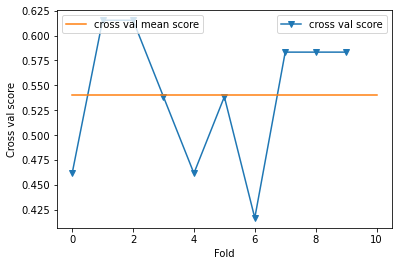

In [47]:
line_3, = plt.plot(cross_val_score(knn_full, X_full, Y_full, cv=10), marker='v', label='cross val score')
line_4, = plt.plot([0,10], [sm_full, sm_full], label='cross val mean score')
first_legend = plt.legend(handles=[line_3], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line_4], loc=2)
plt.xlabel('Fold')
plt.ylabel('Cross val score')
plt.show()

In [48]:
knn_full.fit(X_full, Y_full)
Y_full_pred = knn_full.predict(X_full_new)
pd.DataFrame([Y_full_new, Y_full_pred])

,0,1,2,3,4,5,6,7
House,Gryffindor,Gryffindor,Gryffindor,Gryffindor,Ravenclaw,Slytherin,Slytherin,Other
Unnamed 0,Other,Gryffindor,Slytherin,Gryffindor,Slytherin,Slytherin,Ravenclaw,Other


In [49]:
accuracy_score(Y_full_new, Y_full_pred)*100

50.0